### Aplicando novos conceitos e outras formas de fazer classificação. Para esse notebook usaremos um dataset disponibilizado na kaggle para verificar se um twet tem conteudo racista ou misógino.

In [105]:
import pandas as pd
import re

# para criarmos a rede neural
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

# mapear ints em arrays
from keras.utils.np_utils import to_categorical

from matplotlib import pyplot as plt

In [106]:
data  = pd.read_csv("train.csv")

data.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [107]:
data.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


### Vamos normalizar nosso texto para remover menções.

### Para mapear vamos usar tfidf vectorizer.

In [108]:
xtrain, ytest, xright, yright = train_test_split(data['tweet'],data['label'],random_state=4)

In [109]:
tfidf = TfidfVectorizer()

xtrain_matrix = tfidf.fit_transform(xtrain)
ytest_matrix = tfidf.transform(ytest)

In [110]:
xright_matrix = to_categorical(xright)
yright_matrix = to_categorical(yright)

print(xright.head())

print(xright_matrix[0:5])

12739    0
11256    0
23059    0
16126    0
23220    0
Name: label, dtype: int64
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### Vamos treinar um modelo de aprendizagem profunda para tentar predizer nossos twets.

In [111]:
INPUT = xtrain_matrix.shape[1]
EPOCHS = 20
BATCH_SIZE = 512

In [112]:
model = models.Sequential()
model.add(layers.Dense(20,activation="relu",input_shape=(INPUT,)))
model.add(layers.Dense(20,activation="relu"))
model.add(layers.Dense(2,activation="softmax"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                689120    
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 42        
Total params: 689,582
Trainable params: 689,582
Non-trainable params: 0
_________________________________________________________________


### Treinamos nosso modelo

In [113]:
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [114]:
history = model.fit(xtrain_matrix,xright_matrix,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(ytest_matrix,yright_matrix))
history

Train on 23971 samples, validate on 7991 samples
Epoch 1/20
23971/23971 [==============================] - 11s 443us/step - loss: 0.5171 - acc: 0.9139 - val_loss: 0.3428 - val_acc: 0.9304
Epoch 2/20
23971/23971 [==============================] - 8s 336us/step - loss: 0.2601 - acc: 0.9317 - val_loss: 0.1959 - val_acc: 0.9359
Epoch 3/20
23971/23971 [==============================] - 8s 320us/step - loss: 0.1611 - acc: 0.9402 - val_loss: 0.1410 - val_acc: 0.9457
Epoch 4/20
23971/23971 [==============================] - 8s 317us/step - loss: 0.1035 - acc: 0.9607 - val_loss: 0.1142 - val_acc: 0.9587
Epoch 5/20
23971/23971 [==============================] - 8s 315us/step - loss: 0.0714 - acc: 0.9751 - val_loss: 0.1086 - val_acc: 0.9616
Epoch 6/20
23971/23971 [==============================] - 8s 322us/step - loss: 0.0530 - acc: 0.9822 - val_loss: 0.1097 - val_acc: 0.9622
Epoch 7/20
23971/23971 [==============================] - 8s 317us/step - loss: 0.0412 - acc: 0.9865 - val_loss: 0.1150 - 

In [115]:
history.history

{'val_loss': [0.34276558387758377,
  0.19590232341627561,
  0.14095219977581372,
  0.11417409223626156,
  0.10864768881677551,
  0.109746100467028,
  0.11497309254609424,
  0.12244888816596182,
  0.12832911394069377,
  0.13747763682584294,
  0.1447607078252097,
  0.15368274946622118,
  0.16248685346051311,
  0.1697245876238024,
  0.18162113465410704,
  0.1842619055816131,
  0.19619454137450418,
  0.19896679993207456,
  0.2069960989532595,
  0.21294623847569263],
 'val_acc': [0.9304217237612286,
  0.9359279181554162,
  0.9456888991845682,
  0.9587035425284257,
  0.9615817806207855,
  0.9622074843885126,
  0.9623326252464836,
  0.9628331884545985,
  0.9624577659552752,
  0.962082343679721,
  0.9608309359204976,
  0.9604555135703537,
  0.9618320621875481,
  0.9602052320035911,
  0.9633337515881237,
  0.962207484537692,
  0.9632086108047424,
  0.962207484537692,
  0.9623326253210733,
  0.9620823415091602],
 'loss': [0.5171333342326866,
  0.26008359558675503,
  0.1611066185020942,
  0.10345

In [116]:
def eval_metric(history, metric_name,epochs):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, epochs + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

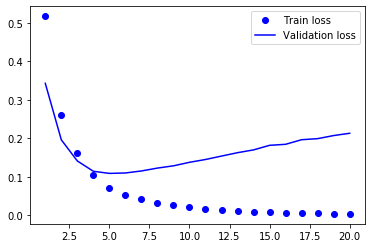

In [117]:
eval_metric(history,"loss",EPOCHS)

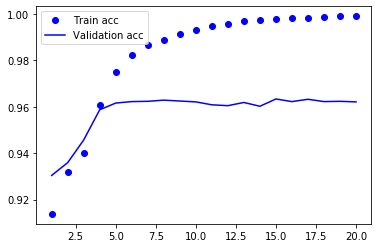

In [118]:
eval_metric(history,"acc",EPOCHS)

In [119]:
output = model.predict(ytest_matrix)

output

array([[9.9999976e-01, 2.7688120e-07],
       [9.9726009e-01, 2.7399398e-03],
       [9.9999976e-01, 2.4509666e-07],
       ...,
       [1.0000000e+00, 1.0267714e-10],
       [9.9983191e-01, 1.6809469e-04],
       [9.9986458e-01, 1.3544482e-04]], dtype=float32)

In [120]:
output = [ 1 if k[0] < 5 else 0 for k in output]

In [121]:
print(output)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [122]:
0 in output

False